In [2]:
# Import modules
import numpy as np
import pandas as pd
import nltk

# Set seed for reproducibility
np.random.seed(5)

# Read in IMDb and Wikipedia movie data (both in same file)
movies_df = pd.read_csv('datasets/netflix_shows.csv')

# Display the data
movies_df

,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
1,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",France,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2,Jailbirds New Orleans,NaN,United States,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
3,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
4,Midnight Mass,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",United States,24-Sep-21,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
...,...,...,...,...,...,...,...,...,...
2657,Yu-Gi-Oh! Arc-V,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada",1-May-18,2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
2658,Yunus Emre,"Gökhan Atalay, Payidar Tüfekçioglu, Baran Akbu...",Turkey,17-Jan-17,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas","During the Mongol invasions, Yunus Emre leaves..."
2659,Zak Storm,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia",13-Sep-18,2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
2660,Zindagi Gulzar Hai,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,15-Dec-16,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


In [3]:
nltk.download('punkt')
# Tokenize a paragraph into sentences and store in sent_tokenized
sent_tokenized = [sent for sent in nltk.sent_tokenize("""
                        Today (May 19, 2016) is his only daughter's wedding. 
                        Vito Corleone is the Godfather.
                        """)]

# Word Tokenize first sentence from sent_tokenized, save as words_tokenized
words_tokenized = [word for word in nltk.word_tokenize(sent_tokenized[0])]

# Remove tokens that do not contain any letters from words_tokenized
import re

filtered = [word for word in words_tokenized if re.search('[a-zA-Z]', word)]

# Display filtered words to observe words after tokenization
filtered

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dscar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Today', 'May', 'is', 'his', 'only', 'daughter', "'s", 'wedding']

In [4]:
from nltk.stem import SnowballStemmer
# Initialize the Snowball stemmer for English
snowball_stemmer = SnowballStemmer('english')

stemmed_words = [snowball_stemmer.stem(word) for word in filtered]
print(stemmed_words)

['today', 'may', 'is', 'his', 'onli', 'daughter', "'s", 'wed']


In [5]:
def tokenize_and_stem(text):
    sent_tokenized = [sent for sent in nltk.sent_tokenize(text)]
    words_tokenized = [word for word in nltk.word_tokenize(sent_tokenized[0])]
    filtered = [word for word in words_tokenized if re.search('[a-zA-Z]', word)]
    stemmed_words = [snowball_stemmer.stem(word) for word in filtered]
    return stemmed_words

In [6]:
from tfIdfInheritVectorizer.feature_extraction.vectorizer import TFIDFVectorizer as TfidfVectorizer
# Might want to switch to sklearn here? Has way more documentation
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, max_features=200000,
                                 min_df=0.0, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem,
                                 ngram_range=(1,3))
tfidf_matrix = tfidf_vectorizer.fit_transform([x for x in movies_df["description"]])
print(tfidf_matrix.shape)

c:\Users\dscar\DAVID GIT\.conda\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\dscar\DAVID GIT\.conda\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twent

(2662, 65931)


In [7]:
# Import k-means to perform clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)

km.fit(tfidf_matrix)
clusters = km.labels_.tolist()
movies_df["cluster"] = clusters
cluster_counts = movies_df['cluster'].value_counts()


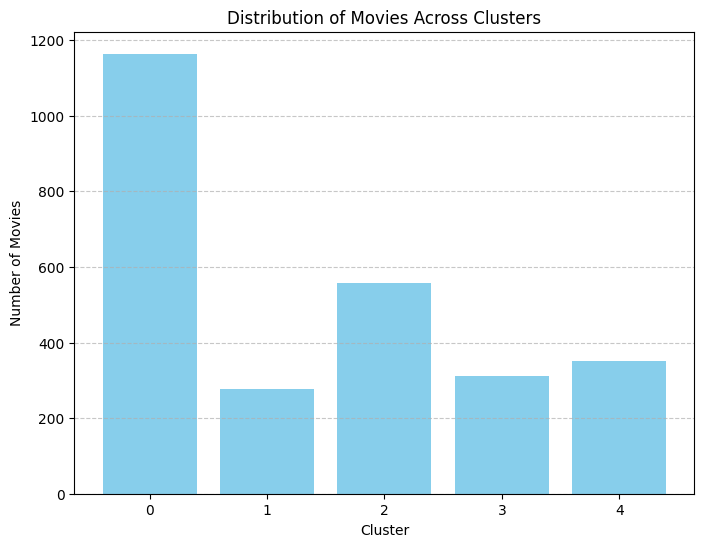

In [8]:
import matplotlib.pyplot as plt

# Plotting histogram
plt.figure(figsize=(8, 6))
plt.bar(cluster_counts.index, cluster_counts.values, color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies Across Clusters')
plt.xticks(cluster_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [9]:
cluster_0_movies = movies_df[movies_df['cluster'] == 2].head(10)
cluster_0_movie_titles = cluster_0_movies['title']
cluster_0_movie_descriptions = cluster_0_movies['description']

for title, description in zip(cluster_0_movie_titles, cluster_0_movie_descriptions):
    print("Title:", title)
    print("Description:", description)
    print()

Title: Ganglands
Description: To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.

Title: Midnight Mass
Description: The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religious fervor to a dying town desperate to believe.

Title: Crime Stories: India Detectives
Description: Cameras following Bengaluru police on the job offer a rare glimpse into the complex and challenging inner workings of four major crime investigations.

Title: Resurrection: Ertugrul
Description: When a good deed unwittingly endangers his clan, a 13th-century Turkish warrior agrees to fight a sultan's enemies in exchange for new tribal land.

Title: Squid Game
Description: Hundreds of cash-strapped players accept a strange invitation to compete in children's games. Inside, a tempting prize awaits — with deadly high stakes.

Title: Dharmakshetra
Description: After the ancient G

In [10]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the similarity distance
similarity_distance = 1 - cosine_similarity(tfidf_matrix)
print(similarity_distance)


[[ 0.00000000e+00  1.00000000e+00  1.00000000e+00 ...  9.90532694e-01
   1.00000000e+00  9.88692414e-01]
 [ 1.00000000e+00  0.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 ...
 [ 9.90532694e-01  1.00000000e+00  1.00000000e+00 ... -2.22044605e-16
   1.00000000e+00  1.00000000e+00]
 [ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
  -2.22044605e-16  1.00000000e+00]
 [ 9.88692414e-01  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00 -2.22044605e-16]]


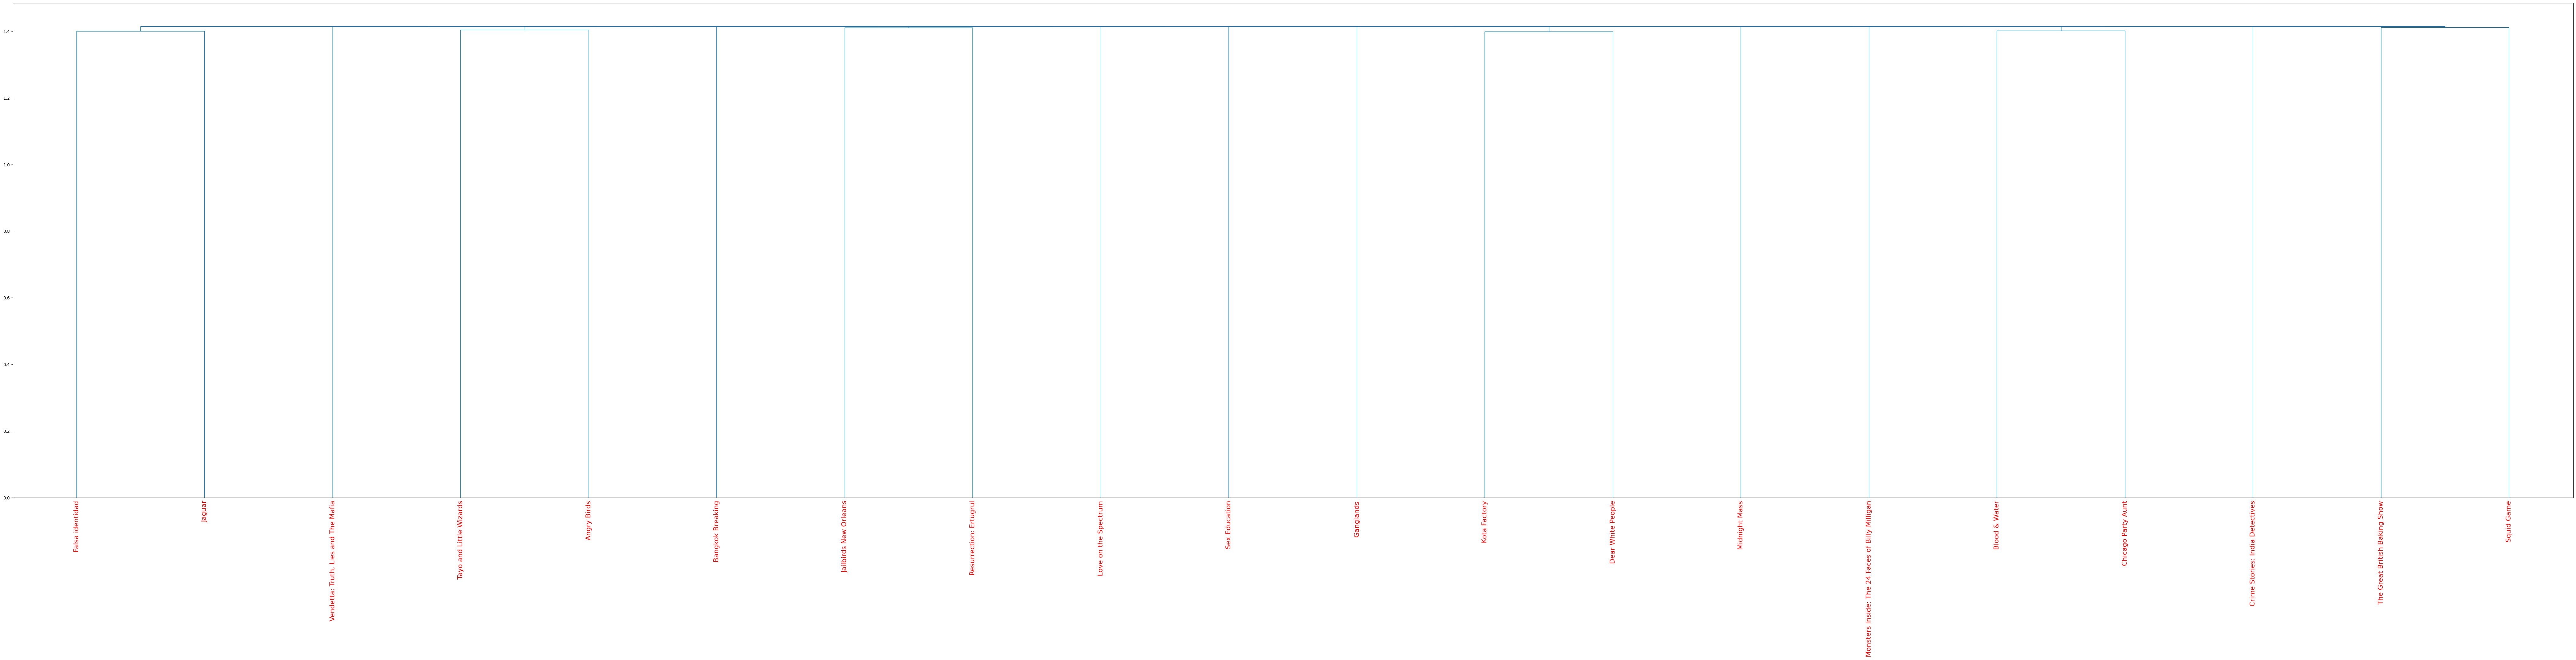

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Select first 100 movies
tfidf_matrix_100 = tfidf_matrix[:20]
movie_titles_100 = movies_df["title"][:20]

# Create mergings matrix 
mergings = linkage(tfidf_matrix_100.toarray(), method='complete')

# Plot the dendrogram, using title as label column
dendrogram_ = dendrogram(mergings,
                         labels=[x for x in movie_titles_100],
                         leaf_rotation=90,
                         leaf_font_size=16,
)

# Adjust the plot
fig = plt.gcf()
_ = [lbl.set_color('r') for lbl in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(108, 21)

# Show the plotted dendrogram
plt.show()


In [12]:
import numpy as np

cosine_sim_matrix = cosine_similarity(tfidf_matrix)
# Exclude self-similarity comparisons (do not compare a document to itself)
np.fill_diagonal(cosine_sim_matrix, 0)
# Get indices for top right of matrix (except main diagonal)
upper_triangular_indices = np.triu_indices(cosine_sim_matrix.shape[0], k=1)
# Get according similarities values generated previously
similarities_flat = cosine_sim_matrix[upper_triangular_indices]
#Sort to get top 20 most similar shows
top_20_indices = similarities_flat.argsort()[-20:][::-1]

most_similar_indices = (upper_triangular_indices[0][top_20_indices], upper_triangular_indices[1][top_20_indices])

for i, (idx1, idx2) in enumerate(zip(*most_similar_indices), 1):
    movie1_title = movies_df.iloc[idx1]["title"]
    movie2_title = movies_df.iloc[idx2]["title"]
    print(f"{i}. {movie1_title} and {movie2_title}")


1. Sin senos sí hay paraíso and Sin Senos sí Hay Paraíso
2. The Ollie & Moon Show and Ollie & Moon
3. ChuChu TV Nursery Rhymes & Kids Songs (Hindi) and ChuChu TV Kids Songs, Learning Videos & Bedtime Stories
4. 9-Feb and 9-Feb
5. The Circle and The Circle France
6. Word Party and Word Party Songs
7. Club Friday The Series 7 and Club Friday The Series 8
8. 忍者ハットリくん and Ninja Hattori
9. Unlucky Ploy and Another Miss Oh
10. Nicky, Ricky, Dicky & Dawn and The Haunting of Bly Manor
11. Tales of the City and Tales of the City (1993)
12. The Circle Brazil and Another Miss Oh
13. Star Trek: The Next Generation and Star Trek: Enterprise
14. Cold Case Files and Cold Case Files Classic
15. The Haunting of Bly Manor and Bo on the Go!
16. Roswell, New Mexico and Curon
17. El señor de los Cielos and Surviving Escobar - Alias JJ
18. Show Me the Money and Loaded
19. Monty Don's French Gardens and Monty Don's Italian Gardens
20. Slasher and Goedam
